# Chapter 4 - Training Models - Stansbury's Coding Examples



## Demonstration Setup

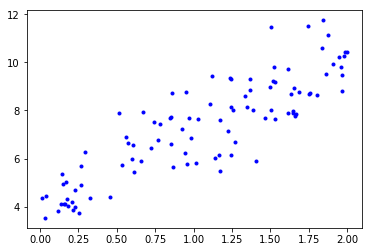

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline 

# Data Preparation
X = 2 * np.random.rand(100,1)
X_b = np.c_[np.ones((100,1)), X]
y = 4 + 3*X + np.random.randn(100,1)  #y = 3x + 4  +guassian noise

# Plot the data
plt.plot(X,y, "b.")

In [2]:
def showProgress(i, X, y, theta):
    """
    Helper function to show progress by (a) printing current theta and (b) plotting current
    regression
    """
    print("Theta (i=" + str(i+1) + "): " + str(theta))
    
    # Predict on x=0 and x=2
    X_new = np.array([[0],[2]])
    X_new_b = np.c_[np.ones((2,1)), X_new] # [[1,0][1,2]]
    y_predict = X_new_b.dot(theta)
    
    # Plot prediction
    plt.plot(X_new, y_predict)
    if (i==0): 
        plt.plot(X,y, "b.")

## Linear Regression - Closed-Form Solution

Theta (i=1): [[4.16659886]
 [2.986608  ]]


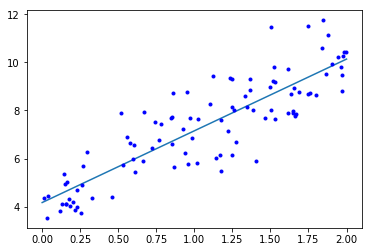

In [3]:
# Solve normal equation for theta
theta = np.linalg.inv( X_b.T.dot(X_b) ).dot(X_b.T).dot(y)

showProgress(0, X, y, theta)

In [4]:
# Predictions based upon theta
X_new = np.array([[0],[0.5],[1],[1.5],[2]])
X_new_b = np.c_[np.ones((5,1)), X_new]
y_predict = X_new_b.dot(theta)

print(y_predict)

[[ 4.16659886]
 [ 5.65990286]
 [ 7.15320686]
 [ 8.64651086]
 [10.13981486]]


In [5]:
#####################################################################
#####################################################################

## Linear Regression using Scikit-Learn

Theta (i=1): [array([4.16659886]), array([[2.986608]])]


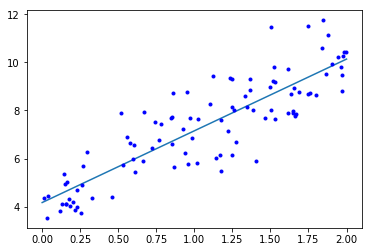

In [6]:
from sklearn.linear_model import LinearRegression
#  Create a linear regression and train it
lin_reg = LinearRegression()
lin_reg.fit(X,y)

theta = [lin_reg.intercept_, lin_reg.coef_]
showProgress(0, X, y, theta)

In [7]:
# Make a prediction using trained model
X_new = np.array([[0],[0.5],[1],[1.5],[2]])
X_new_b = np.c_[np.ones((5,1)), X_new]
y_predict = lin_reg.predict(X_new)

print(y_predict)

[[ 4.16659886]
 [ 5.65990286]
 [ 7.15320686]
 [ 8.64651086]
 [10.13981486]]


In [8]:
#####################################################################
#####################################################################

## Batch Linear Regression

Theta (i=1): [[-0.90664393]
 [-0.99248528]]
Theta (i=1): [[0.94759133]
 [1.25136007]]
Theta (i=2): [[1.95752929]
 [2.44227581]]
Theta (i=3): [[2.51419703]
 [3.06890635]]
Theta (i=4): [[2.82731248]
 [3.39329338]]
Theta (i=5): [[3.00935935]
 [3.55595481]]
Theta (i=6): [[3.12067535]
 [3.63223726]]
Theta (i=7): [[3.1936326 ]
 [3.66253718]]
Theta (i=8): [[3.24560513]
 [3.66850802]]
Theta (i=9): [[3.28592331]
 [3.66175194]]
Theta (i=10): [[3.31960339]
 [3.64848105]]
Theta (i=11): [[3.3493476 ]
 [3.63201712]]
Theta (i=12): [[3.37661685]
 [3.61413223]]
Theta (i=13): [[3.40220595]
 [3.59576761]]
Theta (i=14): [[3.42655216]
 [3.57741924]]
Theta (i=15): [[3.44990062]
 [3.55934457]]
Theta (i=16): [[3.47239314]
 [3.54167343]]
Theta (i=17): [[3.49411575]
 [3.52446741]]
Theta (i=18): [[3.51512431]
 [3.50775181]]
Theta (i=19): [[3.53545813]
 [3.49153267]]
Theta (i=20): [[3.55514742]
 [3.47580597]]
Theta (i=21): [[3.57421718]
 [3.46056247]]
Theta (i=22): [[3.59268936]
 [3.44579042]]
Theta (i=23): [[3.6

 [2.98765737]]
Theta (i=215): [[4.16532823]
 [2.98762465]]
Theta (i=216): [[4.16536784]
 [2.98759295]]
Theta (i=217): [[4.16540622]
 [2.98756225]]
Theta (i=218): [[4.1654434]
 [2.9875325]]
Theta (i=219): [[4.16547943]
 [2.98750367]]
Theta (i=220): [[4.16551433]
 [2.98747575]]
Theta (i=221): [[4.16554814]
 [2.98744869]]
Theta (i=222): [[4.1655809 ]
 [2.98742248]]
Theta (i=223): [[4.16561264]
 [2.98739709]]
Theta (i=224): [[4.16564338]
 [2.98737249]]
Theta (i=225): [[4.16567317]
 [2.98734865]]
Theta (i=226): [[4.16570203]
 [2.98732556]]
Theta (i=227): [[4.16572999]
 [2.98730319]]
Theta (i=228): [[4.16575708]
 [2.98728152]]
Theta (i=229): [[4.16578333]
 [2.98726052]]
Theta (i=230): [[4.16580875]
 [2.98724018]]
Theta (i=231): [[4.16583338]
 [2.98722047]]
Theta (i=232): [[4.16585725]
 [2.98720137]]
Theta (i=233): [[4.16588037]
 [2.98718287]]
Theta (i=234): [[4.16590277]
 [2.98716495]]
Theta (i=235): [[4.16592447]
 [2.98714759]]
Theta (i=236): [[4.1659455 ]
 [2.98713076]]
Theta (i=237): [[4.

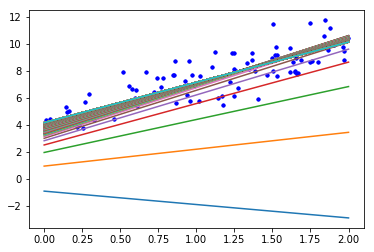

In [9]:
# Set algorithm parameters
eta = 0.1 
n_iterations = 10000
m = (len(X)) # number of inputs
epsilon = 0.00001

# Initialize Linear Model's parameters
theta = np.random.randn(2,1)
showProgress(0, X, y, theta)

# Train Linear Model
for i in range(0,n_iterations):
    
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)  # 2/m * XT.(X.theta - y)

    if np.mean(-gradients) < epsilon:
        break
    
    theta = theta - eta * gradients
    
    showProgress(i, X, y, theta)
    
                
    

In [10]:
# Predictions based upon theta
X_new = np.array([[0],[0.5],[1],[1.5],[2]])
X_new_b = np.c_[np.ones((5,1)), X_new] 

y_predict = X_new_b.dot(theta)
print(y_predict)

[[ 4.16628352]
 [ 5.65971368]
 [ 7.15314383]
 [ 8.64657398]
 [10.14000413]]


In [11]:
#####################################################################
#####################################################################

## Stochastic Gradient Descent

In [12]:
# Learning Schedule
t0, tn = 5, 50
def learning_schedule(t):
    return t0 / (t + tn)

Theta (i=1): [[ 0.70068361]
 [-0.18079369]]
Theta (i=1): [[3.86970317]
 [2.84594963]]
Theta (i=2): [[4.05827646]
 [3.05183645]]
Theta (i=3): [[3.99271968]
 [2.94385428]]
Theta (i=4): [[4.26897415]
 [3.06933128]]
Theta (i=5): [[4.16689587]
 [2.84086408]]
Theta (i=6): [[4.27905816]
 [2.90382545]]
Theta (i=7): [[4.25238458]
 [2.98172581]]
Theta (i=8): [[4.21588342]
 [3.01254804]]
Theta (i=9): [[4.17892543]
 [2.93363028]]
Theta (i=10): [[4.14452849]
 [2.89965827]]
Theta (i=11): [[4.18433816]
 [2.9803092 ]]
Theta (i=12): [[4.18058271]
 [2.96016628]]
Theta (i=13): [[4.26438218]
 [3.00522371]]
Theta (i=14): [[4.16757276]
 [2.90221521]]
Theta (i=15): [[4.17734637]
 [2.92846612]]
Theta (i=16): [[4.16777832]
 [2.91927999]]
Theta (i=17): [[4.16754882]
 [2.92225084]]
Theta (i=18): [[4.21674715]
 [2.9368603 ]]
Theta (i=19): [[4.28965657]
 [3.04771842]]
Theta (i=20): [[4.29378056]
 [3.04914735]]
Theta (i=21): [[4.21798156]
 [2.9375759 ]]
Theta (i=22): [[4.23120858]
 [2.9475424 ]]
Theta (i=23): [[4.1

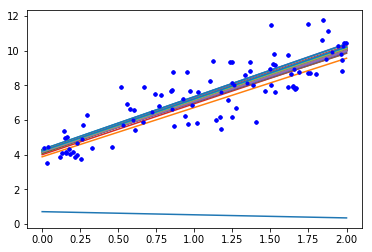

In [13]:
# Set loop
n_epochs = 50
m = (len(X)) # number of inputs

# Initialize Linear Model's parameters
theta = np.random.randn(2,1)
showProgress(0, X, y, theta)


# Train Linear Model
for epoch in range(0, n_epochs):
    for i in range(0,m):
    
        rand_idx = np.random.randint(m)
        xi = X_b[rand_idx:rand_idx+1]
        yi = y[rand_idx:rand_idx+1]
        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)  # 2 * XT.(X.theta - y)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta * gradients
        
    showProgress(epoch, X, y, theta)

plt.plot(X,y, "b.")

In [14]:
# Predictions based upon theta

X_new = np.array([[0],[0.5],[1],[1.5],[2]])
X_new_b = np.c_[np.ones((5,1)), X_new]
y_predict = X_new_b.dot(theta)
print(y_predict)

[[ 4.21571266]
 [ 5.71592623]
 [ 7.2161398 ]
 [ 8.71635337]
 [10.21656694]]


## Mini-Batch Gradient Descent

In [15]:
# Learning Schedule
t0, tn = 5, 50
def learning_schedule(t):
    return t0 / (t + tn)

Theta (i=1): [[ 1.57787436]
 [-0.31530468]]
Theta (i=1): [[4.10883143]
 [2.9472913 ]]
Theta (i=2): [[4.24410817]
 [3.11170103]]
Theta (i=3): [[4.15333497]
 [2.98962848]]
Theta (i=4): [[4.16592922]
 [2.98261672]]
Theta (i=5): [[4.24628357]
 [3.00500916]]
Theta (i=6): [[4.20427402]
 [2.92175835]]
Theta (i=7): [[4.20790846]
 [2.93679599]]
Theta (i=8): [[4.21112782]
 [2.96210955]]
Theta (i=9): [[4.244076  ]
 [3.02211465]]
Theta (i=10): [[4.15113176]
 [2.89306347]]
Theta (i=11): [[4.20885461]
 [2.93653478]]
Theta (i=12): [[4.2233134 ]
 [2.95503973]]
Theta (i=13): [[4.23746517]
 [2.97062603]]
Theta (i=14): [[4.17682305]
 [2.90949184]]
Theta (i=15): [[4.21670264]
 [2.94788744]]
Theta (i=16): [[4.21845493]
 [2.9571169 ]]
Theta (i=17): [[4.21850569]
 [2.96469852]]
Theta (i=18): [[4.2247535 ]
 [2.98991357]]
Theta (i=19): [[4.19760531]
 [2.97025315]]
Theta (i=20): [[4.19686466]
 [2.97936686]]
Theta (i=21): [[4.19678671]
 [2.98254588]]
Theta (i=22): [[4.17883215]
 [2.97518651]]
Theta (i=23): [[4.1

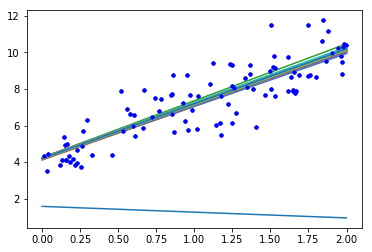

In [16]:
# Set loop
n_epochs = 50
m = (len(X)) # number of inputs

# Initialize Linear Model's parameters
theta = np.random.randn(2,1)
showProgress(0, X, y, theta)

batch_size = 5 # b


# Train Linear Model
for epoch in range(0, n_epochs):
    for i in range(0,m):
    
        rand_idx = np.arange(m) #array from 0 to m-1
        np.random.shuffle(rand_idx) #shuffle index arry

        xi = X_b[rand_idx[:batch_size]] #grab labels for first b rows
        yi = y[rand_idx[:batch_size]]   #grab labels for first b rows
        
        gradients = 2/batch_size * xi.T.dot(xi.dot(theta) - yi)  # 2/b * XT.(X.theta - y)
        eta = learning_schedule(epoch*m + i)
        theta = theta - eta * gradients
        
    showProgress(epoch, X, y, theta)

plt.plot(X,y, "b.")

In [17]:
# Predictions based upon theta

X_new = np.array([[0],[0.5],[1],[1.5],[2]])
X_new_b = np.c_[np.ones((5,1)), X_new]
y_predict = X_new_b.dot(theta)
print(y_predict)

[[ 4.19793158]
 [ 5.69570155]
 [ 7.19347151]
 [ 8.69124147]
 [10.18901143]]


In [18]:
#####################################################################
#####################################################################

## Demo Boston Data Set

Dataset User Guide: https://scikit-learn.org/stable/datasets/index.html#boston-dataset
Dataset API Info: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston


   * CRIM per capita crime rate by town
   * ZN proportion of residential land zoned for lots over 25,000 sq.ft.
   * INDUS proportion of non-retail business acres per town
   * CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
   * NOX nitric oxides concentration (parts per 10 million)
   * RM average number of rooms per dwelling
   * AGE proportion of owner-occupied units built prior to 1940
   * DIS weighted distances to five Boston employment centres
   * RAD index of accessibility to radial highways
   * TAX full-value property-tax rate per \$10,000
   * PTRATIO pupil-teacher ratio by town
   * B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
   * LSTAT % lower status of the population
   * MEDV Median value of owner-occupied homes in \$1000’s


In [19]:
from sklearn import datasets
import numpy as np
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import pandas as pd
from pandas.plotting import scatter_matrix

%matplotlib inline 

boston_housing_data = datasets.load_boston()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C84342A3C8>,
      dtype=object)

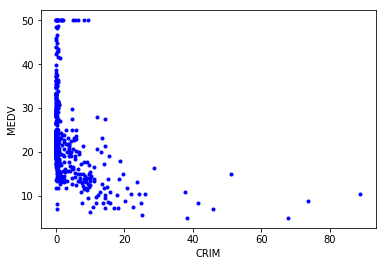

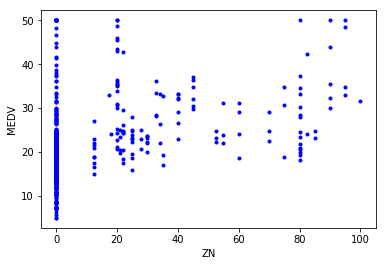

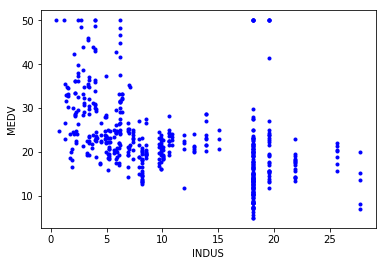

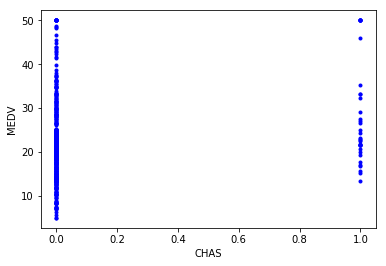

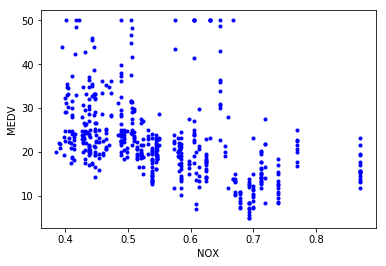

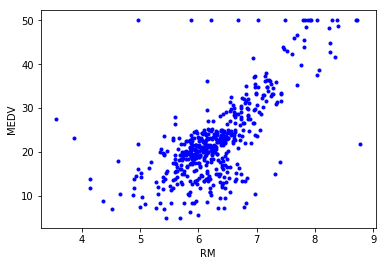

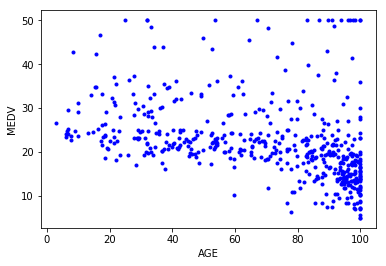

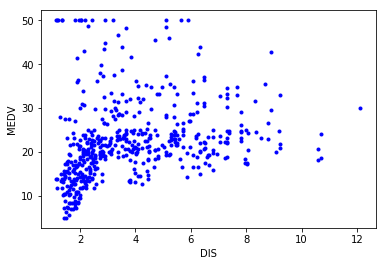

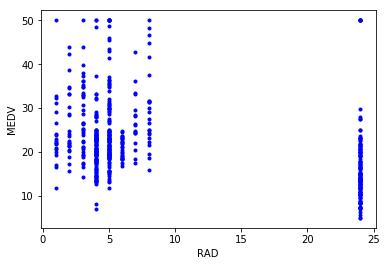

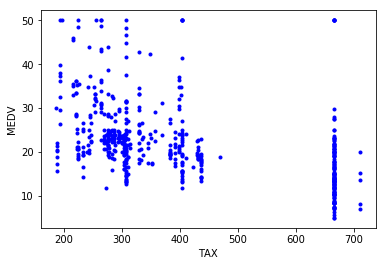

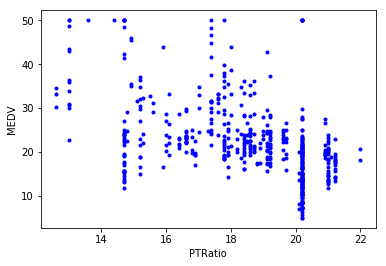

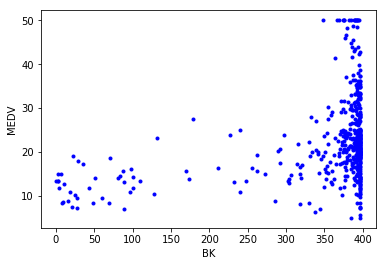

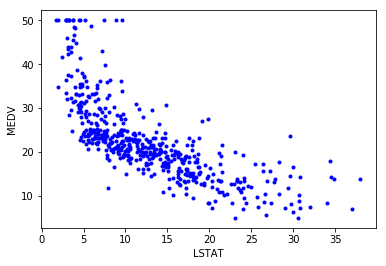

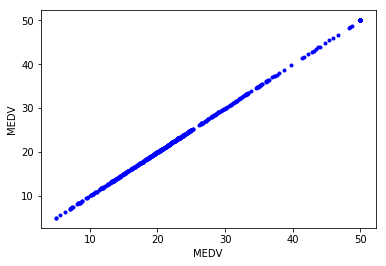

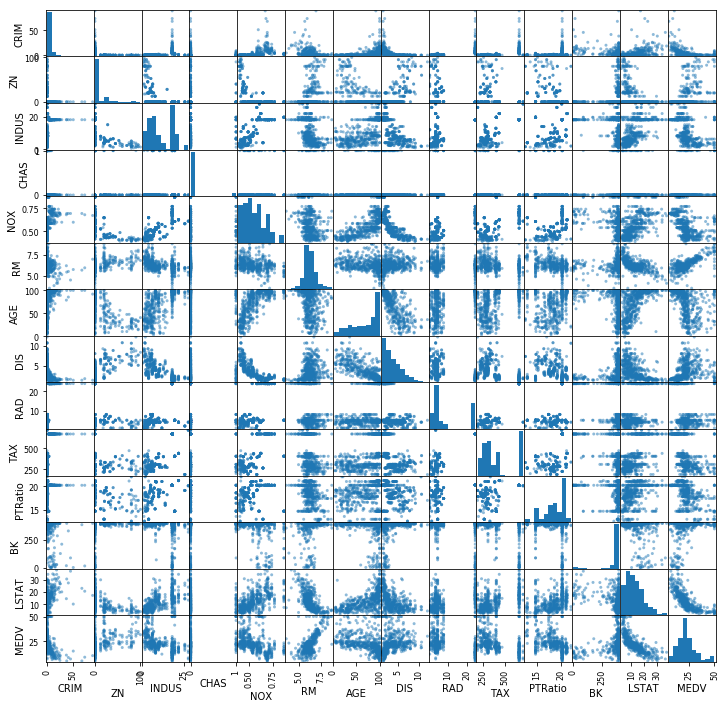

In [20]:
# Attempt to visualize data
boston_df = pd.DataFrame(np.c_[boston_housing_data.data, boston_housing_data.target], 
                  columns=["CRIM", "ZN","INDUS","CHAS", "NOX","RM","AGE",
                           "DIS","RAD","TAX","PTRatio","BK", "LSTAT","MEDV"])

for column in boston_df.columns:
    plt.figure()
    plt.xlabel(column)
    plt.ylabel("MEDV")
    plt.plot(boston_df[column], boston_df["MEDV"], "b.")

scatter_matrix(boston_df, figsize=(12, 12))

30.590284125367916 [-8.17285173e-02  2.39608034e-02  4.03494187e-02  3.47842384e+00
 -2.16383371e+01  4.57254567e+00  2.29908361e-02 -1.22892957e+00
  3.40155000e-01 -1.36580869e-02 -9.64016003e-01  1.08425096e-02
 -4.91602269e-01]


3.273981750019605

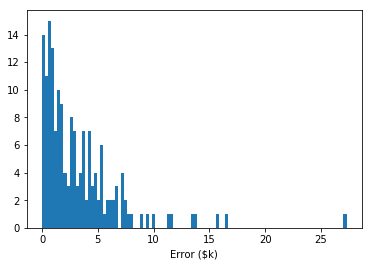

In [21]:
train_X, test_X, train_y, test_y = train_test_split(boston_housing_data.data,
                                                   boston_housing_data.target,
                                                   test_size=0.33)

lin_reg = LinearRegression()
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
print(lin_reg.intercept_, lin_reg.coef_)

plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

mean_absolute_error(test_y, pred_y)

-5.992955296190139 [ 0.00602624  5.70271274 -0.61496961]


4.1755791266618365

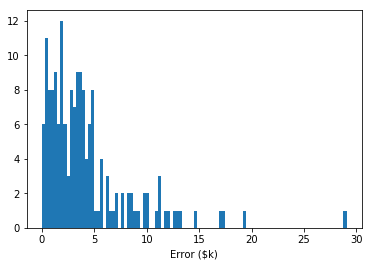

In [22]:
attributes = ["AGE","RM","LSTAT"]
boston_data_set = boston_df[attributes].values

train_X, test_X, train_y, test_y = train_test_split(boston_data_set,
                                                   boston_housing_data.target,
                                                   test_size=0.33)

lin_reg = LinearRegression()
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
print(lin_reg.intercept_, lin_reg.coef_)

plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

mean_absolute_error(test_y, pred_y)

36.77845270270849 [ -4.55689517   4.30465647   2.27270273   2.79384744 -18.50768729
  32.63977526   1.5142452  -16.67707113   7.00562309  -8.74739173
 -19.83814936   3.91716986 -22.48599368]


3.138956033945745

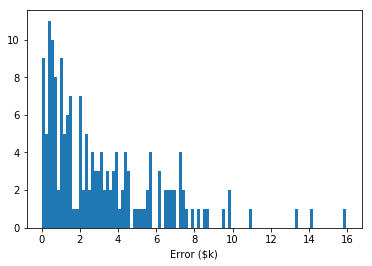

In [23]:
from sklearn.preprocessing import normalize

boston_data_set = normalize(boston_housing_data.data, axis=0, norm='max')


train_X, test_X, train_y, test_y = train_test_split(boston_data_set,
                                                   boston_housing_data.target,
                                                   test_size=0.33)

lin_reg = LinearRegression()
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
print(lin_reg.intercept_, lin_reg.coef_)

plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

mean_absolute_error(test_y, pred_y)

22.420102098006478 [-8.52180267e-01  1.18982975e+00 -1.77402384e-03  6.82113982e-01
 -2.13792360e+00  2.52215801e+00 -3.33980692e-01 -3.38223336e+00
  2.57102671e+00 -1.89304201e+00 -1.95856605e+00  1.05926555e+00
 -3.36472464e+00]


3.4416527957550715

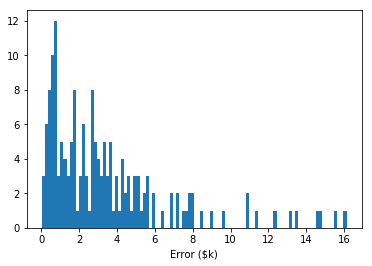

In [24]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

boston_data_set = scaler.fit_transform(boston_housing_data.data)


train_X, test_X, train_y, test_y = train_test_split(boston_data_set,
                                                   boston_housing_data.target,
                                                   test_size=0.33)

lin_reg = LinearRegression()
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
print(lin_reg.intercept_, lin_reg.coef_)

plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

mean_absolute_error(test_y, pred_y)

[22.63280457] [-1.02199741  1.0449512  -0.54035414  0.82857195 -1.66759088  2.74228181
  0.14793847 -3.3171758   1.38218671 -0.60659886 -1.8079352   0.76514262
 -4.06511519]


3.2148634441713715

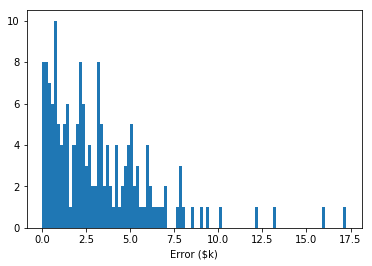

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
# Regularized

scaler = StandardScaler()

boston_data_set = scaler.fit_transform(boston_housing_data.data)


train_X, test_X, train_y, test_y = train_test_split(boston_data_set,
                                                   boston_housing_data.target,
                                                   test_size=0.33)

lin_reg = SGDRegressor(penalty="l2", max_iter=10000, tol=0.001)
lin_reg.fit(train_X,train_y)
pred_y = lin_reg.predict(test_X)

# Outputs the intercept and coefficient of the model (theta_0 and theta_1 respectively)
print(lin_reg.intercept_, lin_reg.coef_)

plt.hist(abs(test_y - pred_y),bins=100)
plt.xlabel("Error ($k)")

mean_absolute_error(test_y, pred_y)

In [26]:
#####################################################################
#####################################################################

## Polynomial Regression

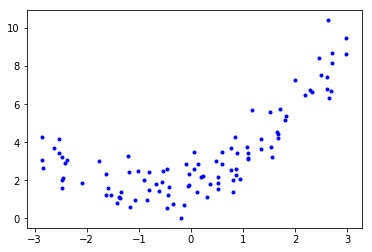

In [27]:
# Polynomial Regression - From textbook

# Sample Training Data
m = 100
X = 6 * np.random.rand(m,1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

plt.plot(X,y,"b.")

In [28]:
from sklearn.preprocessing import PolynomialFeatures

# Add extra features for degree 2 using PolynomialFeatures transform
poly_features = PolynomialFeatures(degree=1, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Train the modified input data set.
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

print(lin_reg.intercept_, lin_reg.coef_)

[3.21635269] [[0.94656602]]


<bound method LinearModel.predict of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>


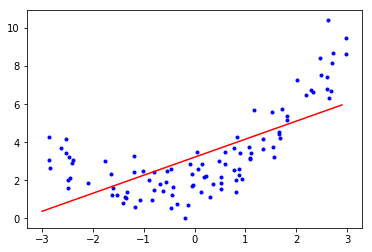

In [29]:
x_test = [[0.1*x] for x in range(-30,30)]

print(lin_reg.predict)
test_X_poly = poly_features.fit_transform(x_test)

predict = lin_reg.predict(test_X_poly)
plt.plot(X,y,"b.")
plt.plot(x_test, predict,"r-")

In [30]:
from sklearn.preprocessing import PolynomialFeatures

# Add extra features up to polynomial 3
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Train the model with the added features.
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

print(lin_reg.intercept_, lin_reg.coef_)

[1.87920899] [[0.86819505 0.518295   0.00537527]]


## Tracking Progress using Learning Curves

Demonstrated using Polynomial Regression examples.

In [31]:
# Learning Cuve function

def plot_learning_curves(model, X, y):
    """
    Plots performance on the training set and testing (validation) set.
    X-axis - number of training samples used
    Y-axis - RMSE
    """
    
    train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.20)
    
    training_errors, validation_errors = [], []
    
    for m in range(1, len(train_X)):
        
        model.fit(train_X[:m], train_y[:m])
        
        train_pred = model.predict(train_X)
        val_pred = model.predict(test_X)
        
        training_errors.append(np.sqrt(mean_squared_error(train_y, train_pred)))
        validation_errors.append(np.sqrt(mean_squared_error(test_y, val_pred)))
        
    plt.plot(training_errors, "r-+", label="train")
    plt.plot(validation_errors, "b-", label="test")
    plt.axis([0, 80, 0, 3])   
    

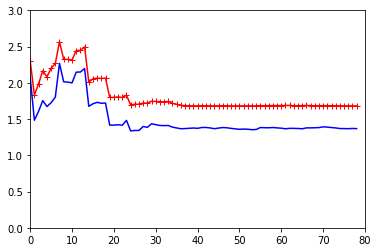

In [32]:
# Learning curve for a linear regression model

plot_learning_curves(LinearRegression(), X, y)

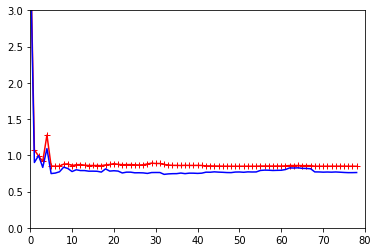

In [33]:
# Demo w/ Degree = 2

from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor

deg = 2
poly_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=deg, include_bias=False)),
    ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(poly_reg, X, y)

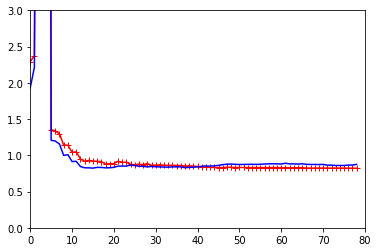

In [34]:
# Demo w/ Degree = 3

from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor

deg = 3
poly_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=deg, include_bias=False)),
    ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(poly_reg, X, y)

## Ridge Regularization

### Closed-Form Approach using Ridge class w/ Cholesky solver (formulation of closed form)

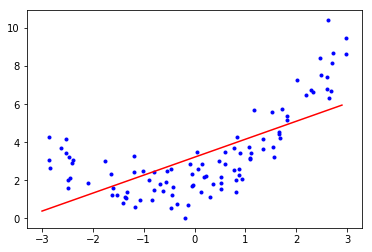

In [35]:
# Linear Ridge Regression - Closed Form - Single Alpha

from sklearn.linear_model import Ridge


x_test = [[0.1*x] for x in range(-30,30)]
plt.plot(X,y,"b.")

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)

predict = ridge_reg.predict(x_test)

plt.plot(x_test, predict,"r-")



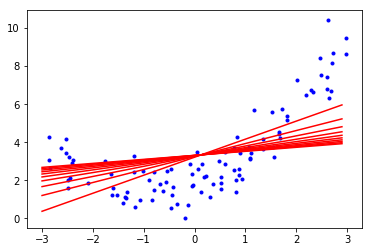

In [36]:
# Linear Ridge Regression - Closed Form - plotting multiple Alphas

from sklearn.linear_model import Ridge

x_test = [[0.1*x] for x in range(-30,30)]
plt.plot(X,y,"b.")

for a in range(0,1000,100):

    ridge_reg = Ridge(alpha=a, solver="cholesky")
    ridge_reg.fit(X,y)

    predict = ridge_reg.predict(x_test)

    plt.plot(x_test, predict,"r-")



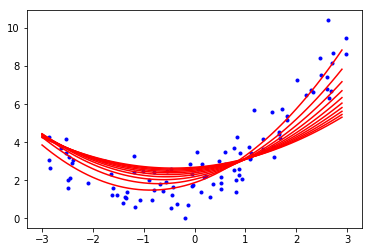

In [37]:
# Closed-Form Polynomial Regression with Ridge Regularization - multiple Alphas shown

from sklearn.linear_model import Ridge

poly_features = PolynomialFeatures(degree=2, include_bias=False)

x_test = [[0.1*x] for x in range(-30,30)]
plt.plot(X,y,"b.")

for a in range(0,1000,100):

    ridge_reg = Ridge(alpha=a, solver="cholesky")
    ridge_reg.fit(poly_features.fit_transform(X),y)

    predict = ridge_reg.predict(poly_features.fit_transform(x_test))

    plt.plot(x_test, predict,"r-")


    

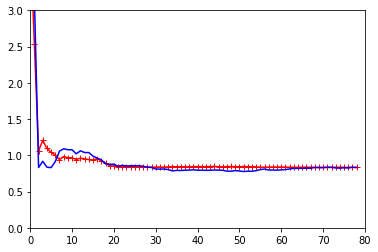

In [38]:
# Closed-Form Polynomial Regression with Ridge Regularization - Learning Curve w/ Alpha = 2
from sklearn.pipeline import Pipeline
deg = 2
poly_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=deg, include_bias=False)),
    ("Ridged", Ridge(alpha=1, solver="cholesky")),
    ])

plot_learning_curves(poly_reg, X, y)

### Stochastic Gradient Descent w/ Ridge Regression Enabled as L2 penalty

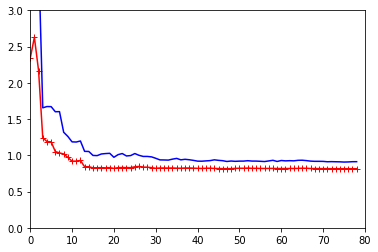

In [39]:
# Learning Curve for SGD Training using Ridge regression

from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor

model = SGDRegressor(penalty="l2", max_iter=10000, tol=0.001)

plot_learning_curves(poly_reg, X, y.ravel())

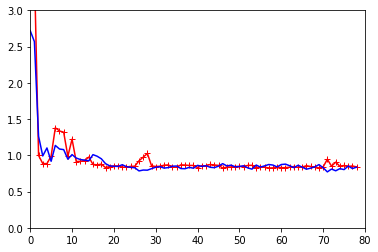

In [40]:
# Learning Curve for SGD Training using Ridge regression

from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor

deg = 2
poly_reg = Pipeline([
    ("poly_features", PolynomialFeatures(degree=deg, include_bias=False)),
    ("Ridge", SGDRegressor(penalty="l2", max_iter=10000, tol=0.001)),
    ])

plot_learning_curves(poly_reg, X, y.ravel())

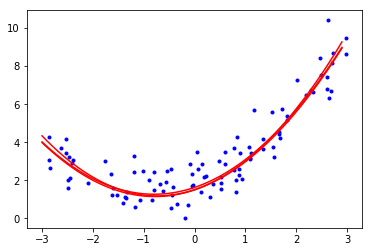

In [41]:
# Ridge Regression - w/ varying polynomial using SGDRegressor

from sklearn.linear_model import SGDRegressor

plt.plot(X,y,"b.")
x_test = [[0.1*x] for x in range(-30,30)]

sgd_reg = SGDRegressor(penalty="l2", tol=0.0001)

for deg in range(1,4):


    X_poly = poly_features.fit_transform(X)
    sgd_reg.fit(X_poly, y.ravel())
    
    predict = sgd_reg.predict(poly_features.fit_transform(x_test))


    plt.plot(x_test, predict,"r-")

#plt.axis([-4, 4, -1, 10])   

